In [1]:
# third cell -
import pandas as pd

weather_full = pd.read_csv("Weather Data.csv", sep=",")

Index(['Rain', 'Temp', 'WindDirection', 'WindSpeed'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rain           16743 non-null  float64
 1   Temp           16743 non-null  int64  
 2   WindDirection  16743 non-null  int64  
 3   WindSpeed      16743 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 523.3 KB


array([[<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'Temp'}>],
       [<AxesSubplot:title={'center':'WindDirection'}>,
        <AxesSubplot:title={'center':'WindSpeed'}>]], dtype=object)

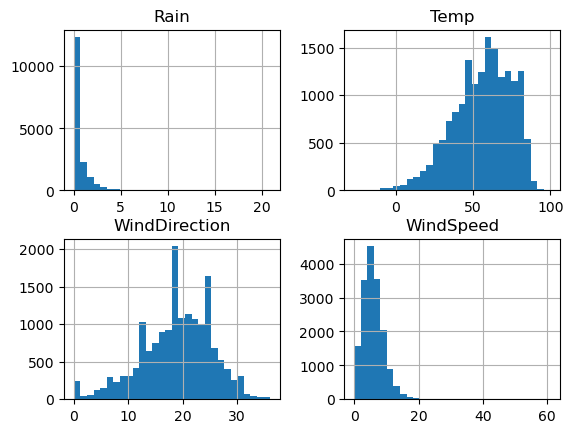

In [6]:
import pandas as pd

data_frame = pd.read_csv("Weather Data.csv")
3**10

print(data_frame.keys())
print()
data_frame.head(n=10)

data_frame.info()
data_frame.hist(bins=30)

In [2]:
import matplotlib.pyplot as plt

def plot2FeatureBinaryConfusion(data_set, feature1Label, feature2Label, targetLabel, predicted, positive=1, negative=0):
## assumes that the target is 0/1

    
    target = data_set[targetLabel]
    
    # Filter with feature 1
    feature1_positives = np.ma.masked_where(target==negative, 
                     data_set[feature1Label])
    true_positive = np.ma.masked_where(predicted!=target, feature1_positives)
    false_negative = np.ma.masked_where(predicted==target, feature1_positives)
    feature1_negatives = np.ma.masked_where(target==positive, 
                     data_set[feature1Label])
    true_negative = np.ma.masked_where(predicted!=target, feature1_negatives)
    false_positive = np.ma.masked_where(predicted==target,feature1_negatives)

   
    feature2 = data_set[feature2Label]
    plt.scatter(true_positive, feature2, c='green', marker='o')
    plt.scatter(false_positive, feature2, c='red', marker='^')
    plt.scatter(true_negative, feature2, c='blue', marker='o')
    plt.scatter(false_negative, feature2, c='orange', marker='^')



    plt.xlabel(feature1Label)
    plt.ylabel(feature2Label)
    plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
    plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(weather_full,
test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  13394 Test size:  3349


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

X = train_set[['Rain']]
y = train_set['WindDirection']
X_test = test_set[['Rain']]
y_test = test_set['WindDirection']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for Rain and WindDirection')
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for Rain and WindDirection
Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  19.269724522136208
 Coefficients [-0.74010754]
 Score 0.013041404720806393
MAE is  5.045185957046814
RMSE is  6.403077443441658
MSE is  40.999400746711366
R^2  0.013041404720806393

Results for linear regression on test data
MAE is  5.084932772982416
RMSE is  6.49153002001889
MSE is  42.13996200080644
R^2  0.009249272243586737


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  
X = train_set[['Rain']]
y = train_set['WindSpeed']
X_test = test_set[['Rain']]
y_test = test_set['WindSpeed']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for decision tree on training data
  Default settings
Confusion Matrix
[[10  0  1 ...  0  0  0]
 [ 0  8  1 ...  0  0  0]
 [ 2  0 36 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Accuracy is   0.19127967746752278
Precision is  0.3049292608453117
Recall is     0.19127967746752278
F1 is         0.1605253875441205

Results for decision tree on test data
  Default settings
Confusion Matrix
[[  0   0   2   3  35   6   9   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4  46  17   8   5   4   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   1   3 115  34  30  20   5   8   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   2   9 164  44  55  28  13   5   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   3   9 180  65  81  26  17  11   1   1   0  

C:\Users\ezimm\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ezimm\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
